Michael Weinold, 2020 \\
Based on [luxpy](https://github.com/ksmet1977/luxpy) by [K.A.G. Smet](https://kuleuven.academia.edu/kevinsmet)


In [135]:
# Required Packages
!pip install luxpy
# !pip install matplotlib
# !pip install scikit-image
# !pip install numpy
# !pip install pandas
# !pip install scipy
# !pip install pickle

In [136]:
# Colour Science
# ========================================
import luxpy
from luxpy import hypspcim
import luxpy.toolboxes.spdbuild as spb 
# Image Handling
# ========================================
import skimage
from skimage import io
# Data Science
# ========================================
import numpy as np
import pandas as pd
# File Handling
# ========================================
import pickle # For file I/O

Loads spectral data from csv file for calculation of CRI and later illumination simulation rendering.

In [137]:
# Reads input file "spd.csv"
dataframe = pd.read_csv('spd.csv',
                        header=None,
                        names=['wavelength', 'intensity'])

# Replaces negative avlues with 0
dataframe[dataframe < 0] = 0

# Sorts values by wavelength overwriting the dataframe
pd.DataFrame.sort_values(dataframe,
                         by='wavelength',
                         inplace=True)

# Resets the index, just in case
pd.DataFrame.reset_index(dataframe,
                         drop=True,
                         inplace=True)

In [138]:
# Appends dataframe to a dictionary
csvdict = {}
csvdict.update({'input': dataframe})

Calculates CRI with LuxPy package. See documentation for details and theory.

In [139]:
cridict = {}

for key in csvdict:
    spd = np.ndarray.transpose( csvdict[key].to_numpy() )
    cri = luxpy.color.cri.spd_to_cri(spd)
    print('LuxPy calculations:')
    print('CRI=', cri[0][0], 'for', key)
    cridict[key] = cri[0][0]

print(cridict)

LuxPy calculations:
CRI= 91.08864314919771 for input
{'input': 91.08864314919771}


Simulates illumination of a given image under a given spectral power distribution.

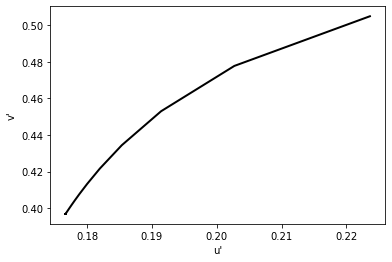

In [140]:
# Tests luxpy functionality
luxpy.plotDL()

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


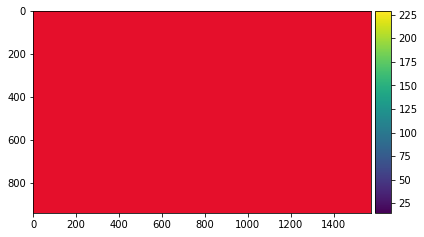

In [141]:
# Convert any input PNG image to uint8 RGB ndarray
imgarray = io.imread('image.jpg').astype(np.uint8)
io.imshow(imgarray)

In [142]:
spddict = {}

for key in csvdict:    
    spd = np.ndarray.transpose( csvdict[key].to_numpy() )
    spddict[key] = spd

(940, 1574, 401)


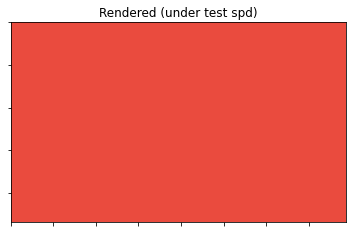

In [143]:
img_hyp = hypspcim.render_image(img = imgarray,
                                cspace = 'ipt',
                                spd = spddict[key],
                                D = 1,
                                show = True,
                                stack_test_ref = 1,
                                write_to_file ='out_2.png')

print(img_hyp.shape)